# Final Project 4
Authors and Creators:

  1. Aliza Muslimah
  2. Padmadi Cahyo Wibowo
  3. Tegar Ahmad Arsy

## Objektif
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:

1. Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu mengimplementasikan Clustering pada data yang diberikan

## **Perkenalan**



Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang
digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

1. Latar belakang memilih kasus
Ingin melakukan clustering masa berlaku kartu kredit nasabah.

2. Data penelitian
Data ini bernama Credit Card Dataset yang diperoleh dari https://www.kaggle.com/datasets/arjunbhasin2013/ccdata . Data ini digunakan untuk melakukan clustering masa berlaku kartu kredit nasabah. Data ini adalah data perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir. Jumlah dataset ini adalah 8.950 baris data dengan 18 atribut.
Atribut yang menjadi label kelas yaitu masa_berlaku_kartu_kredit yang berisi masa berlakunya kartu dalam hitungan bulan.

Nama, penjelasannya, serta tipe data dari atribut yang terdapat pada datasets, adalah sebagai berikut:

Attribute Information:

  1. CUSTID - Identification of Credit Card holder (Categorical)
  2. BALANCE - Balance amount left in their account to make purchases (
  3. BALANCEFREQUENCY - How frequently the Balance is updated, score between 0
  and 1 (1 = frequently updated, 0 = not frequently updated)
  4. PURCHASES - Amount of purchases made from account
  5. ONEOFFPURCHASES - Maximum purchase amount done in one-go
  6. INSTALLMENTSPURCHASES - Amount of purchase done in installment
  7. CASHADVANCE - Cash in advance given by the user
  8. PURCHASESFREQUENCY - How frequently the Purchases are being made, score
  between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
  9. ONEOFFPURCHASESFREQUENCY - How frequently Purchases are happening in
  one-go (1 = frequently purchased, 0 = not frequently purchased)
  10. PURCHASESINSTALLMENTSFREQUENCY - How frequently purchases in
  installments are being done (1 = frequently done, 0 = not frequently done)
  11. CASHADVANCEFREQUENCY - How frequently the cash in advance being paid
  12. CASHADVANCETRX - Number of Transactions made with "Cash in Advance"
  13. PURCHASESTRX - Number of purchase transactions made
  14. CREDITLIMIT - Limit of Credit Card for user
  15. PAYMENTS - Amount of Payment done by user
  16. MINIMUM_PAYMENTS - Minimum amount of payments made by user
  17. PRCFULLPAYMENT - Percent of full payment paid by user
  18. TENURE - Tenure of credit card service for user

3. Objective yang ingin dicapai

model ini diharapkan agar mengetahui masa berlaku kartu kredit.

## Install dan Import Pustaka yang dibutuhkan

In [1]:
'''Pustaka untuk pengolahan data'''
import pandas as pd
import numpy as np
from scipy import stats


'''Pustaka untuk proses machine learning dan data science'''
# Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder #ordinal encoding untuk atribut kategorikal
from sklearn.preprocessing import MinMaxScaler,StandardScaler #scaler for normalization 
from sklearn.preprocessing import OneHotEncoder #one hot encoding nominal atribut
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

# Chi-Square and Mutual Information feature selection for numeric input and categorical output
from sklearn.feature_selection import mutual_info_classif

# splitting dataset and kfold
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV

# dimensionality reduction
from sklearn.decomposition import PCA

# modelling
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# model performance
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_confusion_matrix, r2_score, mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit


'''Pustaka untuk Visualisasi'''
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


'''Pustaka Pendukung'''
# save models
import pickle



## Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

In [2]:
# Loading data dengan Pandas 
df = pd.read_csv('CC GENERAL.csv', skipinitialspace=True)

In [3]:
# Menampilkan sekilas isi data
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
# Mengetahui dimensi data
df.shape

(8950, 18)

In [5]:
# Mengetahui daftar kolom
daftar_kolom = df.columns.values
print(daftar_kolom)

['CUST_ID' 'BALANCE' 'BALANCE_FREQUENCY' 'PURCHASES' 'ONEOFF_PURCHASES'
 'INSTALLMENTS_PURCHASES' 'CASH_ADVANCE' 'PURCHASES_FREQUENCY'
 'ONEOFF_PURCHASES_FREQUENCY' 'PURCHASES_INSTALLMENTS_FREQUENCY'
 'CASH_ADVANCE_FREQUENCY' 'CASH_ADVANCE_TRX' 'PURCHASES_TRX'
 'CREDIT_LIMIT' 'PAYMENTS' 'MINIMUM_PAYMENTS' 'PRC_FULL_PAYMENT' 'TENURE']


In [6]:
# Meihat tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya. 

### Mengecek Missing Values

In [7]:
#cek null values
df.isnull().sum().sort_values() 

CUST_ID                               0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PRC_FULL_PAYMENT                      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
BALANCE                               0
PURCHASES_FREQUENCY                   0
TENURE                                0
CREDIT_LIMIT                          1
MINIMUM_PAYMENTS                    313
dtype: int64

In [8]:
#untuk menemukan missing value diluar format digunakan nilai unik yang ada pada kolom tersebut
#cek missing values
columns = df.columns 
for column in df[columns]:
  print("Nilai unik atribut {} ({} nilai)".format(column.upper(),df[column].nunique()))
  print(f'{column} : {df[column].unique()}')
  print()

Nilai unik atribut CUST_ID (8950 nilai)
CUST_ID : ['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']

Nilai unik atribut BALANCE (8871 nilai)
BALANCE : [  40.900749 3202.467416 2495.148862 ...   23.398673   13.457564
  372.708075]

Nilai unik atribut BALANCE_FREQUENCY (43 nilai)
BALANCE_FREQUENCY : [0.818182 0.909091 1.       0.636364 0.545455 0.875    0.454545 0.727273
 0.5      0.888889 0.090909 0.272727 0.363636 0.       0.666667 0.75
 0.857143 0.181818 0.333333 0.6      0.3      0.125    0.9      0.833333
 0.8      0.2      0.777778 0.555556 0.25     0.142857 0.571429 0.4
 0.444444 0.714286 0.222222 0.1      0.625    0.428571 0.111111 0.285714
 0.7      0.375    0.166667]

Nilai unik atribut PURCHASES (6203 nilai)
PURCHASES : [  95.4     0.    773.17 ...  291.12  144.4  1093.25]

Nilai unik atribut ONEOFF_PURCHASES (4014 nilai)
ONEOFF_PURCHASES : [   0.    773.17 1499.   ...  734.4  1012.73 1093.25]

Nilai unik atribut INSTALLMENTS_PURCHASES (4452 nilai)
INSTALLMENTS_PURCH

#### Mengisi Missing Values

In [9]:
# Mengisi mssing values dengan nilai mediannya
miss_cols = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']
for num_col in miss_cols: 
    df[num_col].fillna(df[num_col].median(),inplace=True)


In [10]:
#cek null values setelah mengisi misssing values
df.isnull().sum().sort_values() 

CUST_ID                             0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
BALANCE                             0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [11]:
# Menghitung statistik deskriptif data 
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### **Merename nama kolom**

In [12]:
# rename kolom dari datasets
def rename_columns_df(df):
    df = df.rename(
        columns={
            'CUST_ID':'id_customer',
            'BALANCE':'saldo',
            'BALANCE_FREQUENCY':'frekuensi_pembaruan_saldo',
            'PURCHASES':'jumlah_pembelian',
            'ONEOFF_PURCHASES':'jumlah_pembelian_maksimum_sekali_jalan',
            'INSTALLMENTS_PURCHASES':'jumlah_pembelian_angsuran',
            'CASH_ADVANCE':'uang_muka',
            'PURCHASES_FREQUENCY':'frekuensi_pembelian',
            'ONEOFF_PURCHASES_FREQUENCY':'jumlah_pembelian_sekali_jalan',
            'PURCHASES_INSTALLMENTS_FREQUENCY':'frekuensi_pembelian_angsuran',
            'CASH_ADVANCE_FREQUENCY':'frekuensi_uang_muka',
            'CASH_ADVANCE_TRX':'jumlah_trx_dengan_uang_muka',
            'PURCHASES_TRX':'jumlah_trx_pembelian',
            'CREDIT_LIMIT':'limit_kredit',
            'PAYMENTS':'jumlah_pembayaran',
            'MINIMUM_PAYMENTS':'minimum_pembayaran',
            'PRC_FULL_PAYMENT':'presentase_pembayaran_penuh',
            'TENURE':'masa_berlaku_kartu_kredit'
        },
    )
    return df


In [13]:
# menampilkan 5 data teratas setelah nama kolom direname
df_preclean = rename_columns_df(df)
df_preclean.head()

,id_customer,saldo,frekuensi_pembaruan_saldo,jumlah_pembelian,jumlah_pembelian_maksimum_sekali_jalan,jumlah_pembelian_angsuran,uang_muka,frekuensi_pembelian,jumlah_pembelian_sekali_jalan,frekuensi_pembelian_angsuran,frekuensi_uang_muka,jumlah_trx_dengan_uang_muka,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,minimum_pembayaran,presentase_pembayaran_penuh,masa_berlaku_kartu_kredit
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
# Melihat daftar kolom setelah di rename
df_preclean.columns

Index(['id_customer', 'saldo', 'frekuensi_pembaruan_saldo', 'jumlah_pembelian',
       'jumlah_pembelian_maksimum_sekali_jalan', 'jumlah_pembelian_angsuran',
       'uang_muka', 'frekuensi_pembelian', 'jumlah_pembelian_sekali_jalan',
       'frekuensi_pembelian_angsuran', 'frekuensi_uang_muka',
       'jumlah_trx_dengan_uang_muka', 'jumlah_trx_pembelian', 'limit_kredit',
       'jumlah_pembayaran', 'minimum_pembayaran',
       'presentase_pembayaran_penuh', 'masa_berlaku_kartu_kredit'],
      dtype='object')

#### Menghapus kolom yang tidak dipakai

In [15]:
# menghapus kolom 'id_customer' karena tidak dibutuhkan
df_clean = df_preclean.drop('id_customer', axis=1)

In [16]:
df_clean.head()

,saldo,frekuensi_pembaruan_saldo,jumlah_pembelian,jumlah_pembelian_maksimum_sekali_jalan,jumlah_pembelian_angsuran,uang_muka,frekuensi_pembelian,jumlah_pembelian_sekali_jalan,frekuensi_pembelian_angsuran,frekuensi_uang_muka,jumlah_trx_dengan_uang_muka,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,minimum_pembayaran,presentase_pembayaran_penuh,masa_berlaku_kartu_kredit
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Eksplorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

In [17]:
#melihat saldo maksimal dan minimal 
saldo = [{'maks':df_preclean['saldo'].max(),'min': df_preclean['saldo'].min()}]
dfsaldo = pd.DataFrame(saldo)
dfsaldo

,maks,min
0,19043.13856,0.0


Saldo maksimal pada dataframe tersebut adalah 19043.13856 dan minimalnya adalah 0

### Feature Selection
**Melihat korelasi atribut terhadap atribut target yaitu masa_berlaku_kartu_kredit**

In [18]:
#Memanggil fungsi corr() untuk mencari korelasi
korelasi = df_clean.corr()

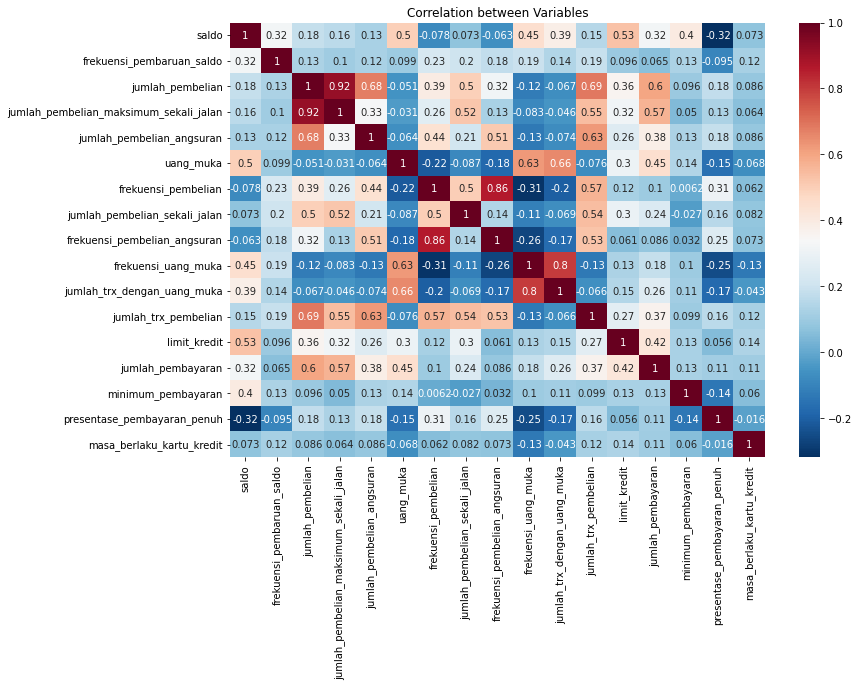

In [19]:
#Visualisasi dari korelasi atribut
plt.figure(figsize=(12,8))
sns.heatmap(korelasi, cmap="RdBu_r",annot=True)

plt.title('Correlation between Variables')
plt.show()



**Dari heatmap diatas dapat diperoleh 5 teratas atribut yang berpengaruh terhadap atribut target. yaitu:**

'frekuensi_pembaruan_saldo','jumlah_trx_pembelian', 'limit_kredit', 'jumlah_pembayaran','frekuensi_uang_muka'

**Sehingga hanya 5 atribut tersebut yang digunakan**

In [20]:
# menghapus semua atribut kecuali 5 atribut teratas dan atribut target
df_eksplor = df_clean.copy()
df_eksplor = df_eksplor[['frekuensi_pembaruan_saldo','jumlah_trx_pembelian','limit_kredit','jumlah_pembayaran','frekuensi_uang_muka','masa_berlaku_kartu_kredit']]


In [21]:
df_eksplor.head()


,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka,masa_berlaku_kartu_kredit
0,0.818182,2,1000.0,201.802084,0.000000,12
1,0.909091,0,7000.0,4103.032597,0.250000,12
2,1.000000,12,7500.0,622.066742,0.000000,12
3,0.636364,1,7500.0,0.000000,0.083333,12
4,1.000000,1,1200.0,678.334763,0.000000,12


### Measure of central tendency

In [22]:
# Measure of central tendency dari atribut selain atribut target 
df_desc = df_eksplor[['frekuensi_pembaruan_saldo','jumlah_trx_pembelian','limit_kredit','jumlah_pembayaran','frekuensi_uang_muka']]

In [23]:
# Nilai rata-rata dari atribut numerikal
mean = df_desc.mean()
mean

frekuensi_pembaruan_saldo       0.877271
jumlah_trx_pembelian           14.709832
limit_kredit                 4494.282473
jumlah_pembayaran            1733.143852
frekuensi_uang_muka             0.135144
dtype: float64

ANALISIS

dapat dilihat pada fungsi diatas jumlah rata rata frekuensi pembaruan saldo sebesar 0.877271, rata rata jumlah transaksi pembelian sebesar 14.709832, rata rata limit kredit sebesar 4494.282473, rata rata jumlah pembayaran sebesar 1733.143852, dan jumlah rata rata frekuensi uang muka 0.135144.

In [24]:
# Nilai median dari atribut numerikal
median = df_desc.median()
median

frekuensi_pembaruan_saldo       1.000000
jumlah_trx_pembelian            7.000000
limit_kredit                 3000.000000
jumlah_pembayaran             856.901546
frekuensi_uang_muka             0.000000
dtype: float64

ANALISIS

dapat dilihat pada fungsi diatas jumlah niali tengah frekuensi pembaruan saldo sebesar 1.000000, nilai tengah transaksi pembelian sebesar 7.000000 , nilai tengah limit kredit sebesar 3000.000000 , nilai tengah pembayaran sebesar 856.901546, dan nilai tengah frekuensi uang muka 0.000000.

In [25]:
# Nilai modus dari semua atribut kecuali atribut target
mode = df_desc.mode()
mode 


,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka
0,1.0,0,3000.0,0.0,0.0


**Rangkuman Measure of Central Tendency**

In [26]:
df_centraltendency = pd.DataFrame(data={
    'Mean':mean,
    'Median':median,
}).transpose()
 
df_centraltendency

,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka
Mean,0.877271,14.709832,4494.282473,1733.143852,0.135144
Median,1.000000,7.000000,3000.000000,856.901546,0.000000


**ANALISIS PERHITUNGAN TENDENSI SENTRAL**

1. Hampir mayoritas atribut bertipe numerikal memiliki nilai mean, median, dan modus yang hampir sama (selisihnya cukup kecil pada atribut tertentu). Hal ini bisa menandakan bahwa mayoritas distribusi data pada atribut numerik cenderung simetris. Namun, masih ada beberapa atribut numerik yang selisih antara mean dan median nya berbeda dua kali lipat (cenderung tidak simetris), seperti jumlah_trx_pembelian dan Jumlah_pembayaran
2. Atribut jumlah_trx_pembelian dan jumlah_pembayaran memiliki mean > median (kecenderungan right skew) dan juga nilai modus sebesar 0.

### Menghitung measure of spread (variability)

In [27]:
# Nilai Simple Varians (ddof=1)

df_desc.var(ddof=1).sort_values()

frekuensi_uang_muka          4.004857e-02
frekuensi_pembaruan_saldo    5.612351e-02
jumlah_trx_pembelian         6.179027e+02
jumlah_pembayaran            8.381394e+06
limit_kredit                 1.323975e+07
dtype: float64

In [28]:
#Sampel Standard Deviation

df_desc.std(ddof=1).sort_values()

frekuensi_uang_muka             0.200121
frekuensi_pembaruan_saldo       0.236904
jumlah_trx_pembelian           24.857649
jumlah_pembayaran            2895.063757
limit_kredit                 3638.646702
dtype: float64

In [29]:
#Nilai skewness

df_desc.skew().sort_values(ascending=False)

jumlah_pembayaran            5.907620
jumlah_trx_pembelian         4.630655
frekuensi_uang_muka          1.828686
limit_kredit                 1.522636
frekuensi_pembaruan_saldo   -2.023266
dtype: float64

In [30]:
#Percentiles

# menghitung kuartile 1,2, dan 3
Q1,Q2, Q3 = df_desc.quantile(0.25), df_desc.quantile(0.5),df_desc.quantile(0.75)

# menghitung IQR (selisih dari Q3 dengan Q1)
IQR = Q3-Q1 

In [31]:
#Ranges

max_ = df_desc.max()
min_ = df_desc.min() 
ranges =  max_ - min_

**Rangkuman Measure of Variability**

In [32]:
df_clean_variability = pd.DataFrame(data={
    'Q1':Q1,
    'Q2':Q2,
    'Q3':Q3,
    'IQR':IQR,
    'Maximum':max_,
    'Minimum':min_,
    'Ranges':ranges
}).transpose()

In [33]:
df_clean_variability

,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka
Q1,0.888889,1.0,1600.0,383.276166,0.000000
Q2,1.000000,7.0,3000.0,856.901546,0.000000
Q3,1.000000,17.0,6500.0,1901.134317,0.222222
IQR,0.111111,16.0,4900.0,1517.858151,0.222222
Maximum,1.000000,358.0,30000.0,50721.483360,1.500000
Minimum,0.000000,0.0,50.0,0.000000,0.000000
Ranges,1.000000,358.0,29950.0,50721.483360,1.500000


ANALISIS PENGUKURAN SEBARAN DATA (Measure of Spread)

1. Sebaran data dapat dijelaskan dengan menggunakan variance atau standar deviasi. Namun standar deviasi lebih cocok daripada variance karena memiliki satuan yang sama dengan data points.
2. Atribut jumlah_pembayaran memiliki range yang paling tinggi. 
3. Pada atribut jumlah_trx_pembelian nilai maximumnya adalah 358 sedangkan 1.5*IQR = 24. Maka bisa disimpulkan terdapat outlier didalamnya.
 





### Eksplorasi Feature





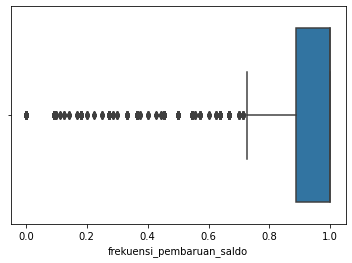

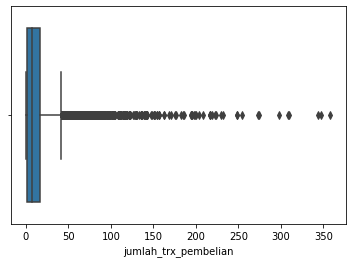

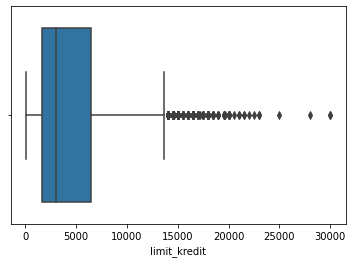

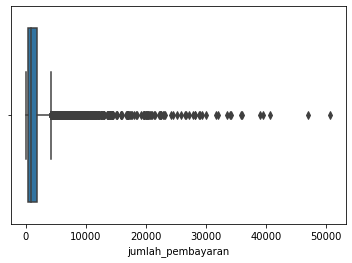

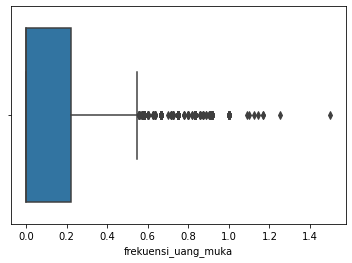

In [34]:
feature = ['frekuensi_pembaruan_saldo','jumlah_trx_pembelian','limit_kredit','jumlah_pembayaran','frekuensi_uang_muka']
for i in feature :
  sns.boxplot( x=df_desc[i] );
  plt.show()




### Eksplorasi Atribut Target

In [35]:
df_eksplor.head()

,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka,masa_berlaku_kartu_kredit
0,0.818182,2,1000.0,201.802084,0.000000,12
1,0.909091,0,7000.0,4103.032597,0.250000,12
2,1.000000,12,7500.0,622.066742,0.000000,12
3,0.636364,1,7500.0,0.000000,0.083333,12
4,1.000000,1,1200.0,678.334763,0.000000,12


In [36]:
#melihat banyak setiap nilai pada label kelas/target 
df_eksplor['masa_berlaku_kartu_kredit'].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: masa_berlaku_kartu_kredit, dtype: int64

In [37]:
label = df_eksplor.columns 
np.array(label)

array(['frekuensi_pembaruan_saldo', 'jumlah_trx_pembelian',
       'limit_kredit', 'jumlah_pembayaran', 'frekuensi_uang_muka',
       'masa_berlaku_kartu_kredit'], dtype=object)

## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan

In [38]:
df_prepro = df_eksplor.copy()

### Balancing data target
Dari pie chart,dapat diketahui bahwa data target imbalanced, sehingga perlu melakukan balancing data. Balancing data dapat digunakan dengan menggunakan undersampling. metode ini juga digunakan untuk mengurangi training time.

In [39]:
'''# Undersampling
# jumlah sampel untuk diundersampling
jml_sampel = 175

# under-sampling kelas agar jumlahnya sama sebesar n_sampel
df_6 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==6].sample(frac=1, random_state=42)[:jml_sampel]
df_7 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==7].sample(frac=1, random_state=42)[:jml_sampel]
df_8 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==8].sample(frac=1, random_state=42)[:jml_sampel]
df_9 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==9].sample(frac=1, random_state=42)[:jml_sampel]
df_10 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==10].sample(frac=1, random_state=42)[:jml_sampel]
df_11 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==11].sample(frac=1, random_state=42)[:jml_sampel]
df_12 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==12].sample(frac=1, random_state=42)[:jml_sampel]



# concat data berlabel 'yes' dan 'no' hasil balanced sampling
df_concat = pd.concat([df_6,df_7,df_8,df_9,df_10,df_11,df_12])

# shuffle row pada data yang sudah digabung agar acak
df_balance = df_concat.sample(frac=1, random_state=42)'''

"# Undersampling\n# jumlah sampel untuk diundersampling\njml_sampel = 175\n\n# under-sampling kelas agar jumlahnya sama sebesar n_sampel\ndf_6 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==6].sample(frac=1, random_state=42)[:jml_sampel]\ndf_7 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==7].sample(frac=1, random_state=42)[:jml_sampel]\ndf_8 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==8].sample(frac=1, random_state=42)[:jml_sampel]\ndf_9 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==9].sample(frac=1, random_state=42)[:jml_sampel]\ndf_10 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==10].sample(frac=1, random_state=42)[:jml_sampel]\ndf_11 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==11].sample(frac=1, random_state=42)[:jml_sampel]\ndf_12 = df_prepro[df_prepro['masa_berlaku_kartu_kredit']==12].sample(frac=1, random_state=42)[:jml_sampel]\n\n\n\n# concat data berlabel 'yes' dan 'no' hasil balanced sampling\ndf_concat = pd.concat([df_6,df_7,df_8,df_9,df

In [40]:
'''#melihat banyak setiap nilai pada label kelas/target setelah undersampling
df_balance['masa_berlaku_kartu_kredit'].value_counts()'''

"#melihat banyak setiap nilai pada label kelas/target setelah undersampling\ndf_balance['masa_berlaku_kartu_kredit'].value_counts()"

### Train-test-split

In [41]:
df_prepro.head()

,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka,masa_berlaku_kartu_kredit
0,0.818182,2,1000.0,201.802084,0.000000,12
1,0.909091,0,7000.0,4103.032597,0.250000,12
2,1.000000,12,7500.0,622.066742,0.000000,12
3,0.636364,1,7500.0,0.000000,0.083333,12
4,1.000000,1,1200.0,678.334763,0.000000,12


In [42]:
'''#Mereset index menjadi index baru
df_prepro = df_prepro.reset_index(drop=True)
df_balance.head()'''

'#Mereset index menjadi index baru\ndf_prepro = df_prepro.reset_index(drop=True)\ndf_balance.head()'

In [43]:

# split atribut dan target
x, y = df_prepro.drop('masa_berlaku_kartu_kredit', axis = 1), df_prepro['masa_berlaku_kartu_kredit']


In [44]:
x.head()

,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka
0,0.818182,2,1000.0,201.802084,0.000000
1,0.909091,0,7000.0,4103.032597,0.250000
2,1.000000,12,7500.0,622.066742,0.000000
3,0.636364,1,7500.0,0.000000,0.083333
4,1.000000,1,1200.0,678.334763,0.000000


In [45]:
y

0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: masa_berlaku_kartu_kredit, Length: 8950, dtype: int64

In [46]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)


In [47]:
x_train.head()

,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka
3015,1.0,16,1000.0,363.125659,0.000000
2691,1.0,0,1800.0,525.461839,0.250000
7492,1.0,24,1700.0,64.658608,0.000000
1371,1.0,9,6000.0,651.887762,0.083333
7297,1.0,0,3000.0,341.938368,0.500000


## Pendefinisian Model
Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.
Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu.

Classification dengan Clustering model
*   lustering merupakan metode pengelompokan yang secara otomatis membagi kumpulan data menjadi beberapa kelompok sesuai kesamaan. Dalam algoritma unsupervised learning, ada banyak tipe clustering dengan fungsi dan tujuan yang berbeda.

Ada beberapa tipe clustering yaitu:


*   Hierarchical Clustering, K-Means Clustering, dan K-NN.
*   Principal Component Analysis, Singular Value Decomposition, dan Independent Component Analysis.



In [48]:
# import package yang dibutuhkan 

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [49]:
import pandas as pd
classifiers = [['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['KMeans :', KMeans(max_iter = 1000)],
               ['DecisionTreeClassifier :', DecisionTreeClassifier()],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)
               ]]

predictions_df=pd.DataFrame()

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, y_train.ravel())
    predictions = classifier.predict(x_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

RandomForest : 0.8912476722532588
Naive Bayes : 0.8379888268156425
KNeighbours : 0.8223463687150838
SVM : 0.8446927374301676
KMeans : 0.0052141527001862194
DecisionTreeClassifier : 0.8655493482309125
LogisticRegression : 0.8446927374301676


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# improve model dan mencari tahu nilai k yang optimal
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 60):
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(x_train, y_train)
  pred_i = kn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error mean')

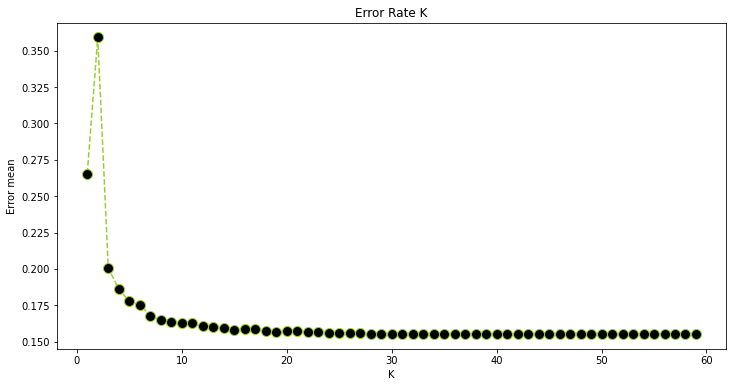

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 60), error, color='yellowgreen', linestyle='dashed', marker='o', markerfacecolor='black', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [52]:
classifiers = [['RandomForest :',RandomForestClassifier(n_estimators = 1000, random_state = 42)], 
               ['Naive Bayes :', GaussianNB()],
               ['KNeighbours :', KNeighborsClassifier(n_neighbors=59)],
               ['SVM :', SVC()],
               ['KMeans :', KMeans(max_iter = 1000)],
               ['DecisionTreeClassifier :', DecisionTreeClassifier(min_samples_leaf=30, random_state=0)],
               ['LogisticRegression :', LogisticRegression(max_iter = 1000)
               ]]

predictions_df=pd.DataFrame()

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, y_train.ravel())
    predictions = classifier.predict(x_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

RandomForest : 0.8945996275605214
Naive Bayes : 0.8379888268156425
KNeighbours : 0.8446927374301676
SVM : 0.8446927374301676
KMeans : 0.015270018621973929
DecisionTreeClassifier : 0.8581005586592179
LogisticRegression : 0.8446927374301676


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# inisialisasi model
random_forest = RandomForestClassifier(n_estimators = 1000, random_state = 42)




## Pelatihan Model
Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [54]:
#RandomForestClassifier
# fit model into training data
random_forest.fit(x_train,y_train)
# get y prediction
y_pred_train_random_forest = random_forest.predict(x_train)
y_pred_test_random_forest = random_forest.predict(x_test) 

## Evaluasi Model
Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus
dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model

In [55]:
random_forest.score(x_train, y_train)

1.0

Di sini kami mendapatkan score pada model logistic regression adalah 0.7565 dan pada model svm adalah 0.754

## Model Inference
Bagian ini diisi dengan model inference, di mana model yang sudah kita
latih akan dicoba pada data selain data yang sudah tersedia. Data yang
dimaksud bisa berupa data buatan oleh student, ataupun data yang ada
pada internet.

In [56]:
df_prepro.tail()

,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka,masa_berlaku_kartu_kredit
8945,1.000000,6,1000.0,325.594462,0.000000,6
8946,1.000000,6,1000.0,275.861322,0.000000,6
8947,0.833333,5,1000.0,81.270775,0.000000,6
8948,0.833333,0,500.0,52.549959,0.166667,6
8949,0.666667,23,1200.0,63.165404,0.333333,6


In [57]:
print('Hasil Prediksi dengan Random Forest Classifier : ', random_forest.predict([[1.000000, 1, 1000.0, 1000.000000, 0.000000]]))

Hasil Prediksi dengan Random Forest Classifier :  [12]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Dari program diatas maka diperoleh Prediksi [0] yang berarti bahwa besok tidak hujan.

## Pengambilan Kesimpulan
Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil
yang didapat dengan dibandingkan dengan objective yang sudah ditulis di
bagian pengenalan. 

model clutering masa berlaku kartu kredit dibentuk dengan menggunakan 5 faktor yang mempengaruhi yaitu 'frekuensi_pembaruan_saldo','jumlah_trx_pembelian', 'limit_kredit', 'jumlah_pembayaran', dan 'frekuensi_uang_muka'. Berdasarkan atribut-atribut tersebut model score yang diperoleh sebesar 0.8945 menggunakan model Random Forest.

Kami memilih model Random Forest karena memiliki nilai akurasi tertinggi dibandingkan model lain. Selain itu, Random Forest dipilih karena kuat terhadap outlier. Hal itu terlihat bahwa atribut yang menjadi feature memiliki banyak data pencilan namun model memiliki akurasi yang cukup tinggi. Kelebihan lainnya yaitu model ini memiliki resiko overvitiing yang rendah, berjalan secara efisien pada data yang besar, dan bekerja dengan baik pada data non-linier.

In [59]:
x_train.head()

,frekuensi_pembaruan_saldo,jumlah_trx_pembelian,limit_kredit,jumlah_pembayaran,frekuensi_uang_muka
3015,1.0,16,1000.0,363.125659,0.000000
2691,1.0,0,1800.0,525.461839,0.250000
7492,1.0,24,1700.0,64.658608,0.000000
1371,1.0,9,6000.0,651.887762,0.083333
7297,1.0,0,3000.0,341.938368,0.500000


In [58]:
# Menyimpan model Voting Classifier di pickle
pickle.dump(random_forest, open('./model_classifier_random_forest.pkl','wb'))